# GIT Repository  

# https://github.com/kakarlarenusree/MLP_Tutorial

# MLP Tutorial Notebook
Using Iris Dataset (sklearn).
It includes activation function visualizations, dataset preprocessing, model training, and decision
boundary plots for three different MLP configurations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

## Activation Functions
This section generates plots for three commonly used activation functions: Sigmoid, Tanh, and ReLU.
These functions introduce non-linearity into the network, enabling MLPs to learn complex patterns.

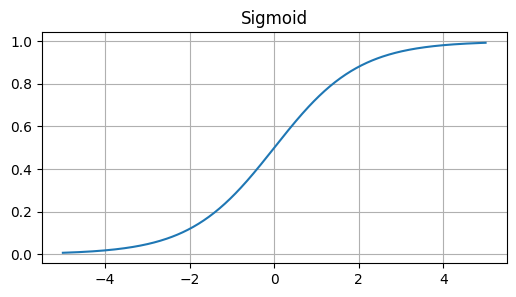

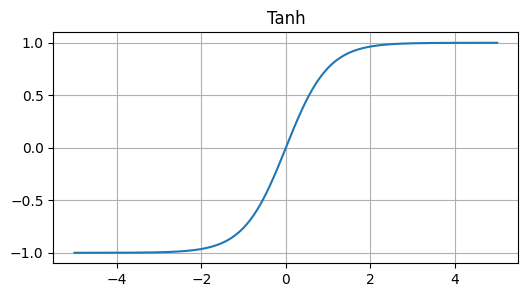

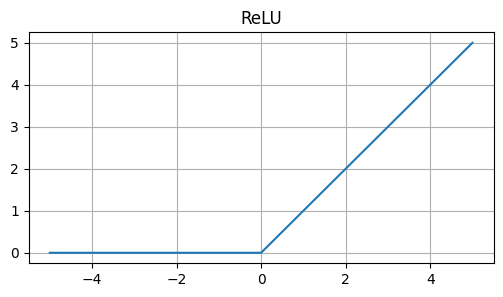

In [2]:
x = np.linspace(-5,5,400)
sigmoid = 1/(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0,x)

plt.figure(figsize=(6,3)); plt.plot(x,sigmoid); plt.title("Sigmoid"); plt.grid(); plt.show()
plt.figure(figsize=(6,3)); plt.plot(x,tanh); plt.title("Tanh"); plt.grid(); plt.show()
plt.figure(figsize=(6,3)); plt.plot(x,relu); plt.title("ReLU"); plt.grid(); plt.show()

## MLP Architecture Diagrams
Before training, this section provides schematic diagrams illustrating small, medium, and deep MLP
architectures. These diagrams help visualize the concepts of depth (number of layers) and width (neurons per layer).

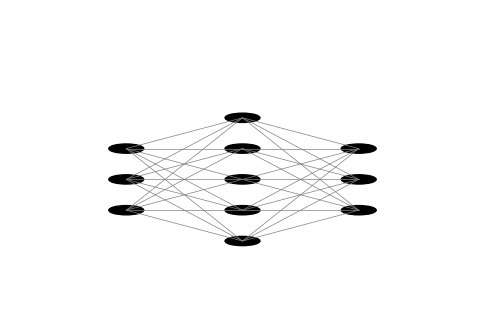

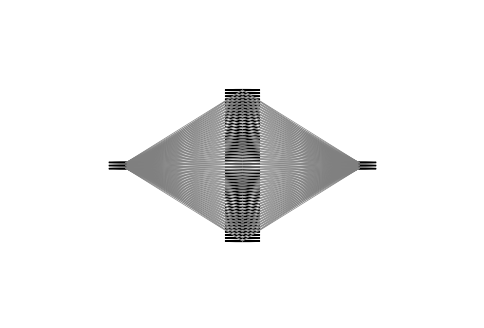

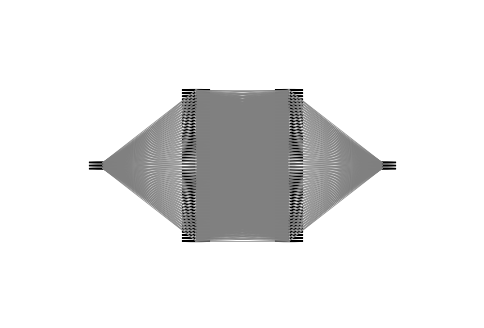

In [9]:
def simple_mlp_diagram(layers):
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    ax.axis("off")
    for i, neurons in enumerate(layers):
        for j in range(neurons):
            x = i
            y = j - neurons/2
            circle = plt.Circle((x, y), 0.15, color='black')
            ax.add_patch(circle)
            if i > 0:
                for k in range(layers[i-1]):
                    y_prev = k - layers[i-1]/2
                    ax.plot([i-1, i], [y_prev, y], color="gray", linewidth=0.5)
    plt.xlim(-1, len(layers))
    plt.ylim(-max(layers), max(layers))
    plt.show()
simple_mlp_diagram([3, 5, 3])       # Small MLP
simple_mlp_diagram([3, 50, 3])      # Medium MLP
simple_mlp_diagram([3, 50, 50, 3])  # Deep MLP


## Load & Prepare Iris Dataset
We load the Iris dataset from sklearn and extract two features (petal length and petal width) for
visualization. The data is standardized using StandardScaler to ensure faster and more stable model training.

In [3]:
iris = load_iris()
X = iris.data[:,2:4]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [8]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


## Train MLP Models
Three MLP configurations are trained:
- Model 1: 1 hidden layer with 5 neurons (underfitting expected)
- Model 2: 1 hidden layer with 50 neurons (balanced model)
- Model 3: 2 hidden layers with 50 neurons each (potential overfitting)

This allows us to compare how increasing depth and width influences decision boundaries and accuracy.

1 layer, 5 neurons — Accuracy: 0.91


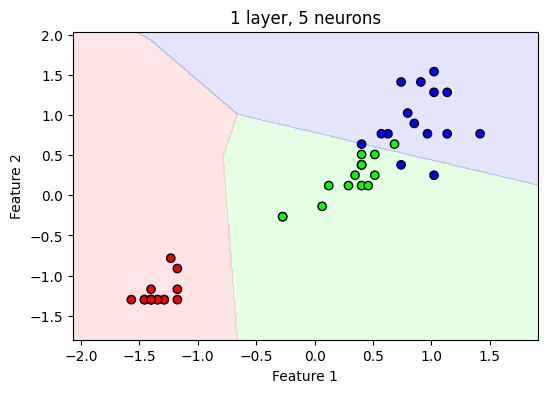

1 layer, 50 neurons — Accuracy: 0.91


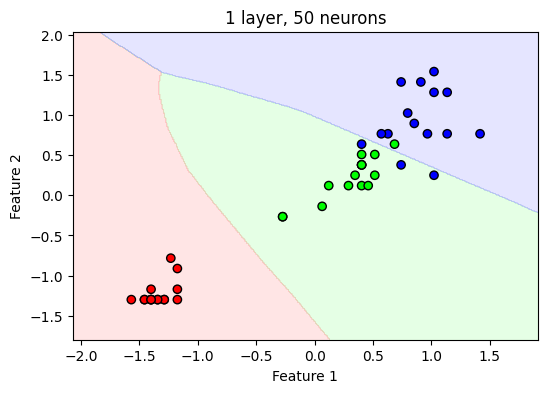

2 layers, 50 neurons each — Accuracy: 0.91


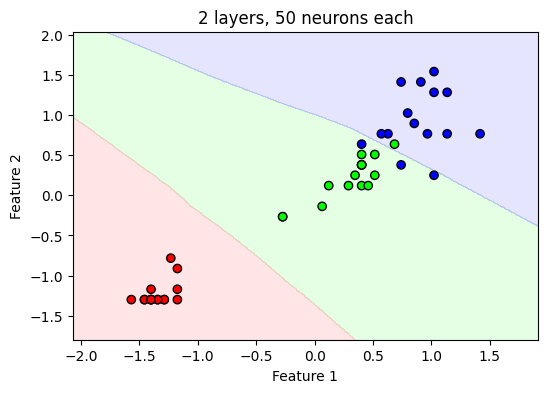

In [7]:
configs = [
    ((5,), "1 layer, 5 neurons"),
    ((50,), "1 layer, 50 neurons"),
    ((50,50), "2 layers, 50 neurons each")
]

for cfg, label in configs:
    clf = MLPClassifier(hidden_layer_sizes=cfg, activation='relu', solver='adam',
                        max_iter=2000, random_state=42)
    clf.fit(X_train_s,y_train)
    acc = clf.score(X_test_s,y_test)
    print(f"{label} — Accuracy: {acc:.2f}")
    plot_decision_boundary(clf,X_test_s,y_test,label)